In [2]:
import utils
from dataset import BuildingDataset, get_transform
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks
import torch

In [3]:
# Load data for exploration.
dataset_test = BuildingDataset(
    "datasets/mlc_training_data/images_annotated/",
)

dataset_test[0]

(Image([[[31, 37, 39,  ...,  2, 20, 32],
         [27, 36, 39,  ..., 16, 25, 28],
         [27, 33, 36,  ..., 23, 20, 14],
         ...,
         [25, 18, 11,  ..., 38, 36, 34],
         [22, 11,  2,  ..., 34, 36, 35],
         [23,  9,  0,  ..., 31, 33, 34]],
 
        [[59, 65, 64,  ..., 21, 35, 47],
         [55, 64, 64,  ..., 35, 40, 43],
         [55, 61, 61,  ..., 43, 35, 29],
         ...,
         [75, 68, 61,  ..., 67, 65, 63],
         [75, 64, 55,  ..., 63, 62, 62],
         [76, 62, 50,  ..., 60, 59, 61]],
 
        [[37, 43, 42,  ..., 15, 30, 42],
         [33, 42, 42,  ..., 29, 35, 38],
         [33, 39, 39,  ..., 34, 30, 24],
         ...,
         [37, 30, 23,  ..., 37, 35, 32],
         [33, 22, 13,  ..., 33, 33, 31],
         [34, 20,  8,  ..., 30, 30, 30]]], dtype=torch.uint8, ),
 {'boxes': BoundingBoxes([[305., 464., 365., 503.],
                 [400., 401., 433., 435.],
                 [330., 362., 419., 481.],
                 [349., 276., 422., 336.],
         

In [4]:
# Load data for exploration.
dataset_expl = BuildingDataset(
    "datasets/mlc_training_data/images_annotated/",
)

# data = [d for d in dataset_expl]
data = [dataset_expl[i] for i in range(10)]

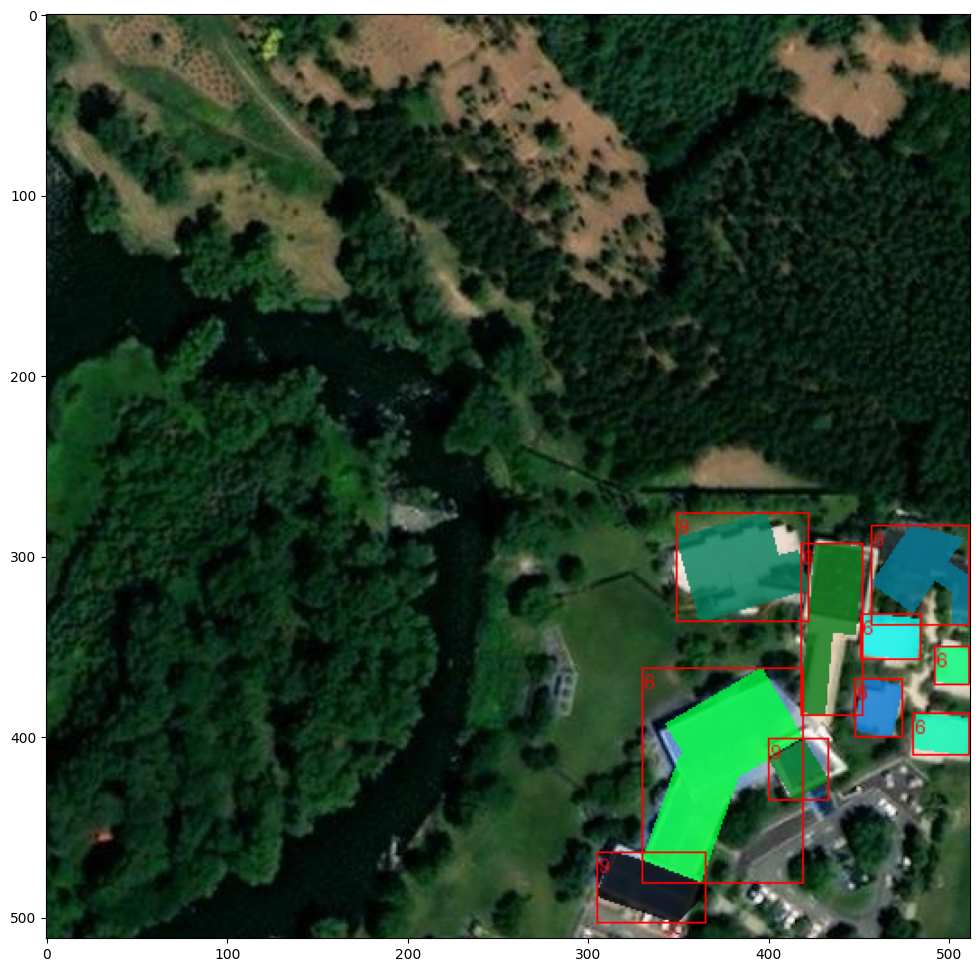

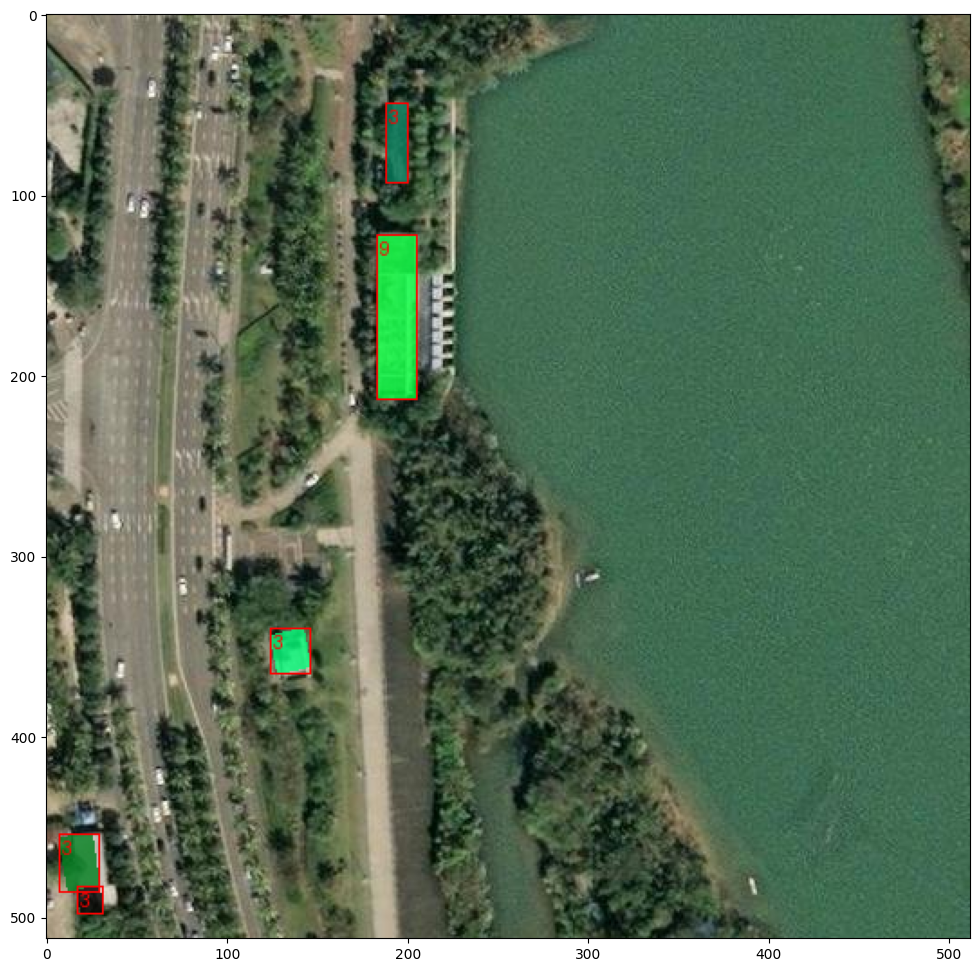

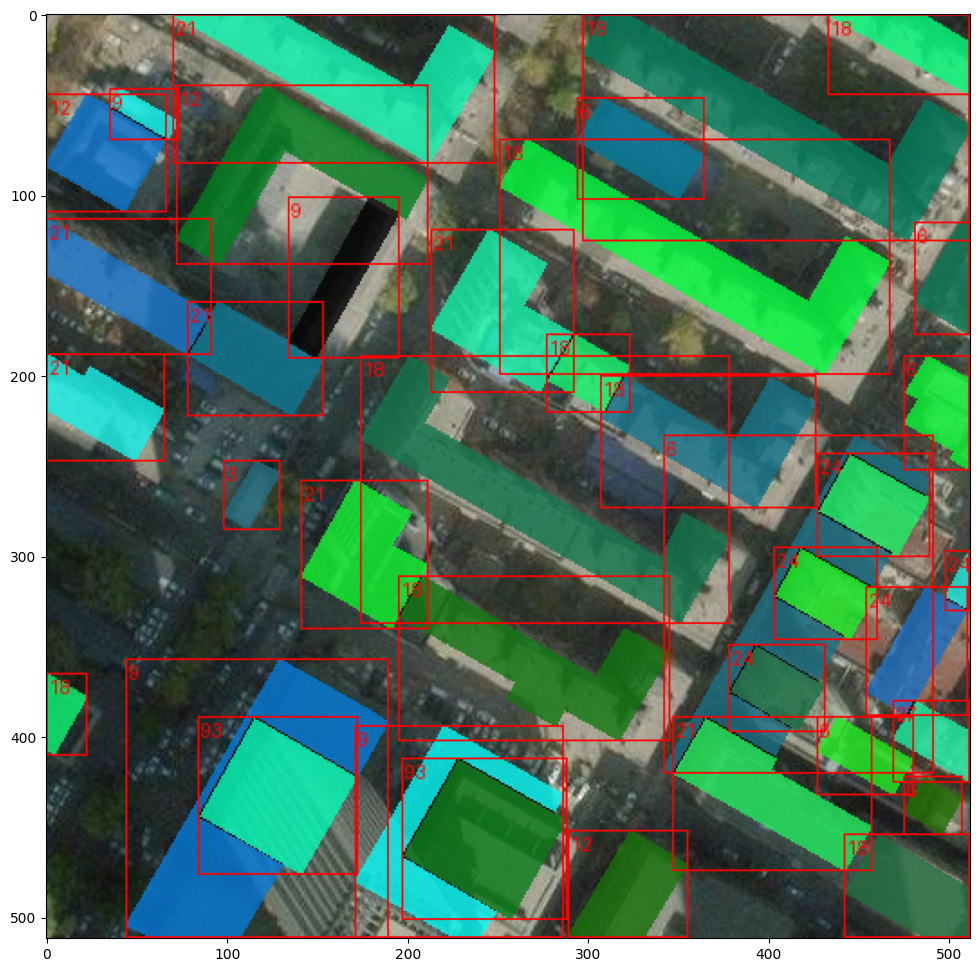

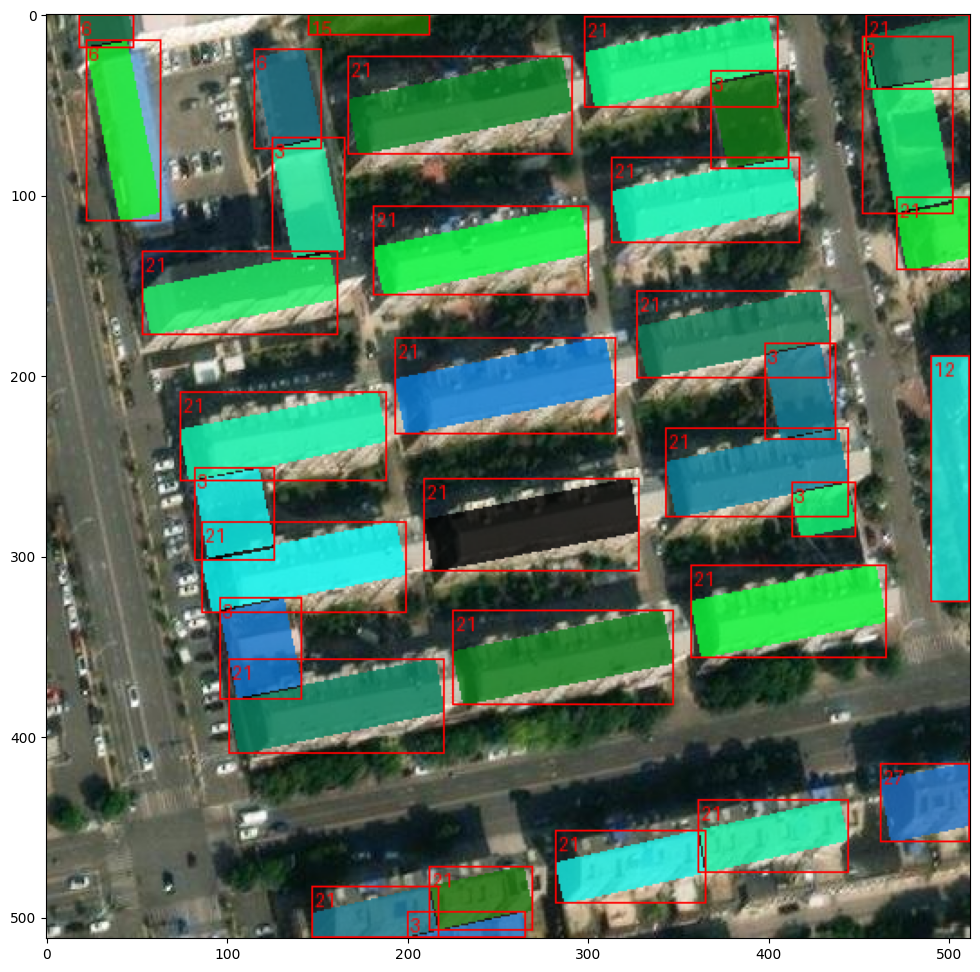

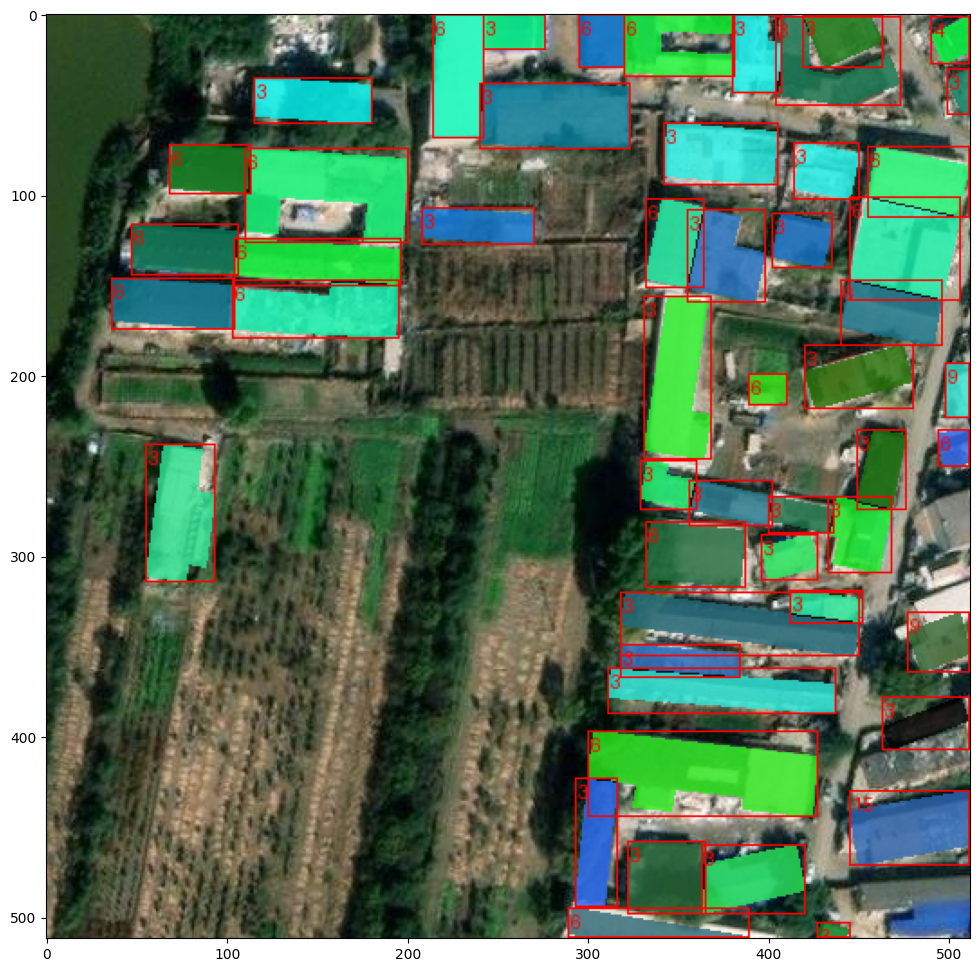

In [5]:
def show_segmentation(img, masks, boxes=None, labels=None, bcolors="red"):
    output_image = draw_segmentation_masks(img, masks.to(torch.bool), alpha=0.8)
    if boxes is not None:
        output_image = draw_bounding_boxes(output_image, boxes, labels, colors=bcolors)

    plt.figure(figsize=(12, 12))
    plt.imshow(output_image.permute(1, 2, 0))


for sample in data[:10]:
    img, masks, boxes = sample[0], sample[1]["masks"], sample[1]["boxes"]
    height_labels = [str(h.item()) for h in sample[1]["building_heights"]]
    show_segmentation(img, masks, boxes, height_labels)

In [ ]:
def show_distribution(values, bins=None):
    counts, bins = np.histogram(
        values,
        bins=bins,
    )
    plt.stairs(counts, bins, fill=True)

    print("Min: ", masks.min(), "Max: ", masks.max())

    for q in [0.25, 0.5, 0.75, 0.95, 0.99]:
        print(f"Quantile {q}: {np.quantile(values, q)}")


# heights = [d[1]["building_heights"] for d in data]
# heights = np.stack(heights, axis=0)
# show_distribution(heights, [3, 6, 9, 15, 25, 40, 70, 120, 200, max(250, heights.max())])

masks = [len(d[1]["masks"]) for d in data]
masks = np.stack(masks, axis=0)
show_distribution(masks, [3, 6, 9, 15, 25, 40, 70, 120, 200])

In [ ]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights="DEFAULT")

dataset = BuildingDataset(
    "datasets/mlc_training_data/images_annotated/",
    transforms=get_transform(train=True),
)

data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=2,
    shuffle=True,
    num_workers=4,
    collate_fn=utils.collate_fn,
)

# For Training
images, targets = next(iter(data_loader))

images = list(image for image in images)
targets = [{k: v for k, v in t.items()} for t in targets]
output = model(images, targets)  # Returns losses and detections
print(output)

# For inference
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
predictions = model(x)
print(predictions[0])